# Solutions to sheet 4

Import the necessary libraries: `numpy`, `matplotlib`. We can use the `as` keyword to define shortcuts to access the libraries (example: `import numpy as np` means we can access numpy functions with the `np.` syntax).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats as stats

In [2]:
plt.rcParams.update({
  'figure.figsize': [8.0, 5.0],
  'xtick.major.width': 1.5,
  'xtick.major.size': 10.0,
  'xtick.minor.size': 5.0,
  'ytick.major.width': 1.5,
  'ytick.major.size': 10.0,
  'ytick.minor.size': 5.0,
  'font.size': 16,
})

Fix some of the physics parameters we will use.

In [3]:
m_top = 173       # in GeV
gamma_top = 1.33  # in GeV

## Implement Cauchy and Gauss distributions

This implements a Cauchy distribution according to:

$$
f(x) = \frac{1}{\pi\gamma} \cdot \frac{\gamma^2}{(x - x_0)^2 + \gamma^2}
$$

In [4]:
def Cauchy(x, x_0, gamma):
    """Implementation of a Cauchy distribution.
    
    Args:
      x: the point at which to evaluate
      x_0: the central value of the distribution
      gamma: the half width at half maximum
    
    Returns:
      function evaluated at point x
    """
    pref = 1 / np.pi / gamma
    return pref * np.power(gamma, 2) / (np.power(x - x_0, 2) + np.power(gamma, 2))

This implements a Gauss distribution according to:

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot \exp \left( - \frac{(x - \mu)^2}{ 2 \sigma^2} \right)
$$

In [5]:
def Gauss(x, mu, sigma):
    """Implementation of a Gauss distribution.
    
    Args:
      x: the point at which to evaluate
      mu: the central value of the distribution
      sigma: the standard deviation of the distribution
    
    Returns:
      function evaluated at point x
    """
    pref = 1 / sigma / np.sqrt(2 * np.pi)
    return pref * np.exp(- np.power(x - mu, 2) / 2 / sigma / sigma)

## Plot the distribution

Let's plot 200 points in the interval $[170, 176]$.

In [6]:
n_points = 200
interval = (170, 176)

In [7]:
xfunc = np.linspace(*interval, n_points)

In [8]:
yfunc = Cauchy(xfunc, m_top, gamma_top/2)

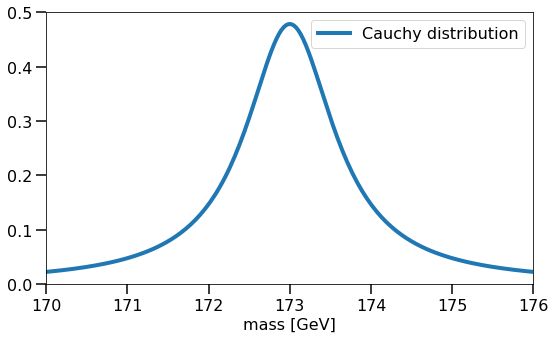

In [9]:
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.xlim(*interval)
plt.xlabel("mass [GeV]")
plt.legend()
plt.tight_layout()

## Accept-reject method

Use a random number generator to generate 2000 random points following a uniform distribution scaled with the pre-factor $0.3$.

In [10]:
gen = np.random.default_rng()

In [11]:
n_samples = 2000

In [12]:
x = gen.uniform(*interval, n_samples)

In [13]:
y = gen.uniform(0, 0.5, n_samples)

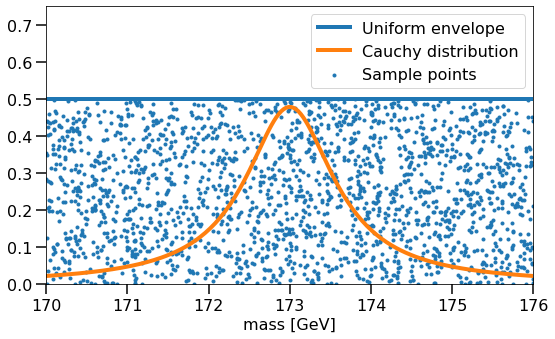

In [14]:
plt.plot(xfunc, np.full(n_points, 0.5), label="Uniform envelope", lw=4)
plt.scatter(x, y, label="Sample points", marker=".")
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.xlim(*interval)
plt.ylim([0, 0.75])
plt.xlabel("mass [GeV]")
plt.legend()
plt.tight_layout()

We cannot distinguish accepted and rejected points yet. So let's apply the Von Neumann criterion.

In [15]:
accepted = (y <= Cauchy(x, m_top, gamma_top/2))

In [16]:
x_accepted = x[accepted]
y_accepted = y[accepted]

In [17]:
x_rejected = x[np.invert(accepted)]
y_rejected = y[np.invert(accepted)]

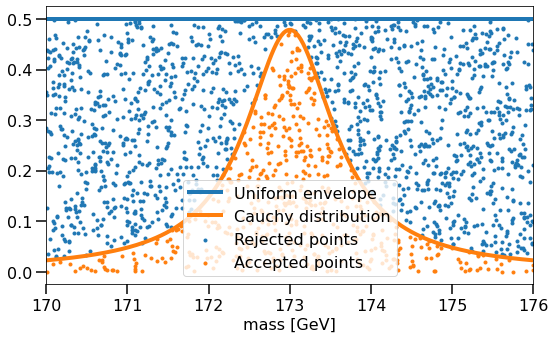

In [18]:
plt.plot(xfunc, np.full(n_points, 0.5), label="Uniform envelope", lw=4)
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.scatter(x_rejected, y_rejected, label="Rejected points", marker=".")
plt.scatter(x_accepted, y_accepted, label="Accepted points", marker=".")
plt.xlim(*interval)
plt.xlabel("mass [GeV]")
plt.legend()
plt.tight_layout()

In [19]:
print("Acceptance rate: {}".format(len(x_accepted) / len(x)))

Acceptance rate: 0.279


## accept-reject method with Gauss

Let's repeat the same exercise, but this time following a Gauss distribution.

In [20]:
gfunc = 2 * Gauss(xfunc, m_top, gamma_top)

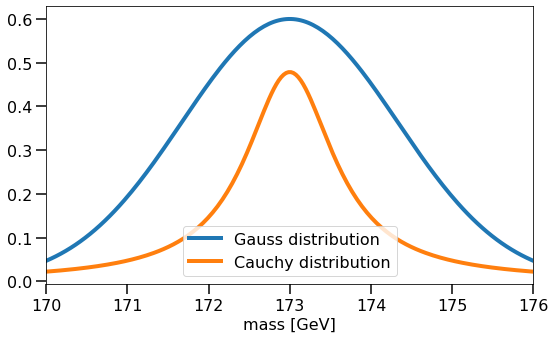

In [21]:
plt.plot(xfunc, gfunc, label="Gauss distribution", lw=4)
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.xlim(*interval)
plt.xlabel("mass [GeV]")
plt.legend()
plt.tight_layout()

In [22]:
n_samples = 2000

In [23]:
x = gen.uniform(*interval, n_samples)

In [24]:
y = 2 * Gauss(x, m_top, gamma_top) * gen.uniform(0, 1, n_samples)

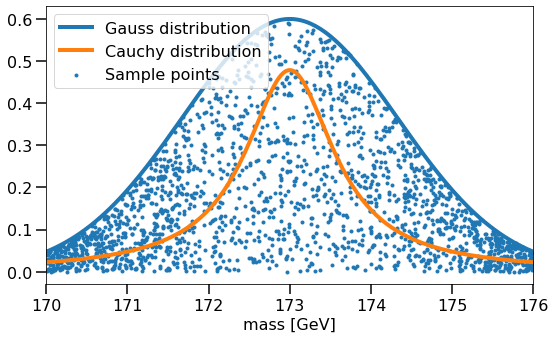

In [25]:
plt.plot(xfunc, gfunc, label="Gauss distribution", lw=4)
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.scatter(x, y, label="Sample points", marker=".")
plt.xlim(*interval)
plt.xlabel("mass [GeV]")
plt.legend()
plt.tight_layout()

In [26]:
accepted = (y <= Cauchy(x, m_top, gamma_top/2))

In [27]:
x_accepted = x[accepted]
y_accepted = y[accepted]

In [28]:
x_rejected = x[np.invert(accepted)]
y_rejected = y[np.invert(accepted)]

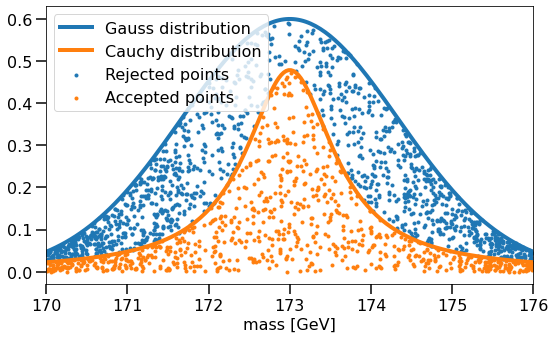

In [29]:
plt.plot(xfunc, gfunc, label="Gauss distribution", lw=4)
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.scatter(x_rejected, y_rejected, label="Rejected points", marker=".")
plt.scatter(x_accepted, y_accepted, label="Accepted points", marker=".")
plt.xlim(*interval)
plt.xlabel("mass [GeV]")
plt.legend()
plt.tight_layout()

In [30]:
print("Acceptance rate: {}".format(len(x_accepted) / (len(x))))

Acceptance rate: 0.381


Why is the acceptance rate still so low? And what about the point density? Is it constant across the shape of the envelope? If not, why not?


## Trying to fill the points into a histogram

Let's try to fill the points into a histogram.

In [31]:
n_bins = 30

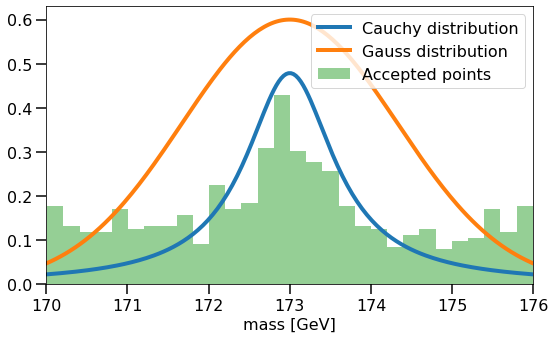

In [32]:
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.plot(xfunc, gfunc, label="Gauss distribution", lw=4)
plt.hist(x_accepted, label="Accepted points", bins=n_bins, alpha=0.5, density=True)
plt.xlim(*interval)
plt.xlabel("mass [GeV]")
plt.legend()
plt.tight_layout()

Why is the shape not reflected correctly in the histogram? What did we forget? We need to remember that the point density in $x$ was generated according to a uniform distribution, but we chose the Gauss function is an envelope! So we need to apply additional event weights.

In [33]:
weights_accepted = 2 * Gauss(x_accepted, m_top, gamma_top)

In [34]:
weights_accepted = weights_accepted * n_bins / n_samples

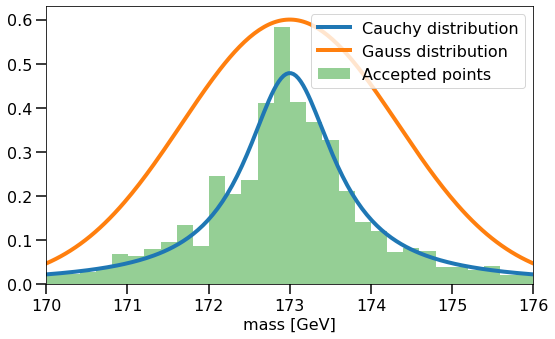

In [35]:
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.plot(xfunc, gfunc, label="Gauss distribution", lw=4)
contents, bin_edges, _ = plt.hist(x_accepted, label="Accepted points", weights=weights_accepted, bins=n_bins, alpha=0.5)
plt.xlim(*interval)
plt.xlabel("mass [GeV]")
plt.legend()
plt.tight_layout()

In [36]:
bin_width = (bin_edges[-1] - bin_edges[0]) / n_bins

In [37]:
np.sum(contents) * bin_width

0.8622913450065397

In [38]:
integrate.quad(lambda x: Cauchy(x, m_top, gamma_top/2), *interval)[0]

0.8611280990752312

## How can we avoid the problem of uneven point densities?

The issue is that we sampled $x \in [170, 176]$ uniformly without caring about the shape of the Gaussian envelope distribution. To achieve uniform point density, we need to consider the cumulative distribution function (CDF) of the Gaussian distribution. This leads us to the inversion method.

Just for reference: the code below repeats the same exercise as above, but this time the $x$ values are sampled by drawing from a uniform distribution in $[0, 1]$ and then projecting these values on the inverse of the CDF of the Gaussian distribution. This gives us uniform point density.

In [39]:
n_samples = 2000

In [40]:
# This is the "percent-point function" (quantile function) of the Gaussian distribution,
# i.e. the inverse of its cumulative density function.
x = stats.norm.ppf(gen.uniform(0, 1, n_samples), loc=m_top, scale=gamma_top)

In [41]:
y = 2 * Gauss(x, m_top, gamma_top) * gen.uniform(0, 1, n_samples)  # Same as before!

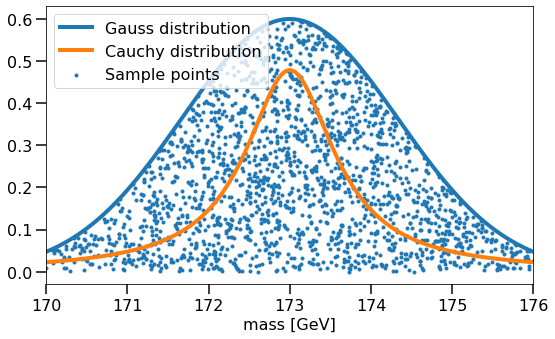

In [42]:
plt.plot(xfunc, gfunc, label="Gauss distribution", lw=4)
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.scatter(x, y, label="Sample points", marker=".")
plt.xlim(*interval)
plt.xlabel("mass [GeV]")
plt.legend()
plt.tight_layout()

In [43]:
accepted = (y <= Cauchy(x, m_top, gamma_top/2))

In [44]:
x_accepted = x[accepted]
y_accepted = y[accepted]

In [45]:
x_rejected = x[np.invert(accepted)]
y_rejected = y[np.invert(accepted)]

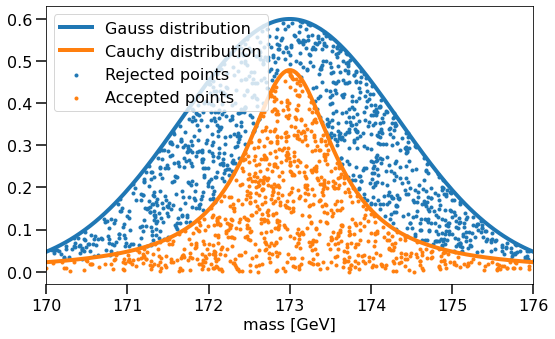

In [46]:
plt.plot(xfunc, gfunc, label="Gauss distribution", lw=4)
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.scatter(x_rejected, y_rejected, label="Rejected points", marker=".")
plt.scatter(x_accepted, y_accepted, label="Accepted points", marker=".")
plt.xlim(*interval)
plt.xlabel("mass [GeV]")
plt.legend()
plt.tight_layout()

In [47]:
print("Acceptance rate: {}".format(len(x_accepted) / (len(x))))

Acceptance rate: 0.454


As we can see, this leads also to a higher acceptance rate. Let's fill the histogram again. Since we have achieved uniform point density already, we don't need to apply any weights.

In [48]:
n_bins = 30

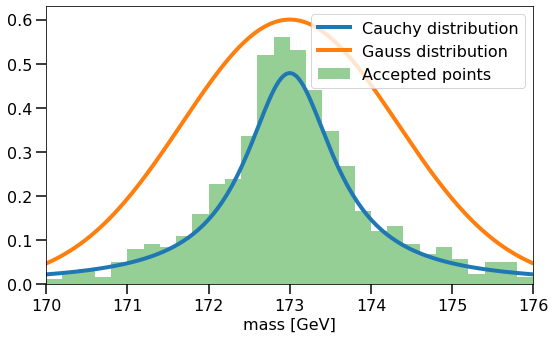

In [49]:
plt.plot(xfunc, yfunc, label="Cauchy distribution", lw=4)
plt.plot(xfunc, gfunc, label="Gauss distribution", lw=4)
plt.hist(x_accepted, label="Accepted points", bins=n_bins, range=interval, alpha=0.5, density=True)
plt.xlim(*interval)
plt.xlabel("mass [GeV]")
plt.legend()
plt.tight_layout()

In [50]:
bin_width = (bin_edges[-1] - bin_edges[0]) / n_bins

In [51]:
np.sum(contents) * bin_width

0.8622913450065397

In [52]:
integrate.quad(lambda x: Cauchy(x, m_top, gamma_top/2), *interval)[0]

0.8611280990752312